## Introduction of the Problem
**The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation.**

### Source
**The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.**

**_Attributes:_**

**Demographic:**
1. Sex: male or female(Nominal)
2. Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. Education: no further information provided <br>

**Behavioral:**
1. Current Smoker: whether or not the patient is a current smoker (Nominal)
2. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Information on medical history:**
1. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
2. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
3. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
4. Diabetes: whether or not the patient had diabetes (Nominal) <br>

**Information on current medical condition:**
1. Tot Chol: total cholesterol level (Continuous)
2. Sys BP: systolic blood pressure (Continuous)
3. Dia BP: diastolic blood pressure (Continuous)
4. BMI: Body Mass Index (Continuous)
5. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
6. Glucose: glucose level (Continuous) <br>

**Target variable to predict:**
1. 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# The code was removed by Watson Studio for sharing.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
heart_df.shape

(4238, 16)

### Check for the null values in the data set.

In [3]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### Drop Null Values

In [4]:
heart_df.dropna(inplace = True)

In [5]:
heart_df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
heart_df.shape

(3656, 16)

In [7]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
heart_df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [10]:
heart_df['male'].value_counts()

0    2034
1    1622
Name: male, dtype: int64

In [11]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
heart_df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [13]:
Y = heart_df['TenYearCHD']

In [14]:
X = heart_df.copy()

In [15]:
X.pop('TenYearCHD')

0       0
1       0
2       0
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
15      1
16      0
17      1
18      0
19      0
20      0
22      0
23      0
24      0
25      1
27      0
28      1
29      0
30      0
31      0
32      1
       ..
4203    0
4204    0
4205    0
4206    0
4207    1
4209    0
4210    0
4211    0
4212    0
4213    1
4214    1
4215    0
4216    0
4217    0
4218    0
4219    0
4220    1
4221    1
4222    0
4223    1
4224    0
4225    0
4226    1
4227    0
4228    0
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [16]:
X.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object

In [17]:
Y.dtypes

dtype('int64')

### Apply the Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
stdsclr.fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[ 1.11982472, -1.23335117,  1.97575158, ...,  0.29168785,
         0.35633992, -0.20312694],
       [-0.8929969 , -0.41559058,  0.01979497, ...,  0.7246142 ,
         1.60828949, -0.24495595],
       [ 1.11982472, -0.1819447 , -0.95818334, ..., -0.10926099,
        -0.06097661, -0.49592996],
       ...,
       [ 1.11982472,  0.05170118, -0.95818334, ...,  0.04570696,
        -0.81214636,  0.17333408],
       [ 1.11982472,  0.16852412,  0.99777327, ..., -1.49413337,
        -0.89560966, -0.57958797],
       [-0.8929969 ,  0.28534706,  0.01979497, ..., -1.06120701,
         0.35633992,  1.05174313]])

#### Apply the Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

### Apply the GLM Method to know the P-value.

In [20]:
import statsmodels.api as sm
logml = sm.GLM(y_train,(sm.add_constant(x_train)),family = sm.families.Binomial())

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2924
Model:                            GLM   Df Residuals:                     2908
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1106.8
Date:                Tue, 24 Mar 2020   Deviance:                       2213.7
Time:                        08:56:50   Pearson chi2:                 2.92e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.5433      0.793    -10.774      0.000     -10.097      -6.989
male                0.5911      0.122      4.850      0.000       0.352       0.830
age                 0.0599      0.007      7.998      0.000       0.045       0.075
education          -0.0640      0.055     -1.157      0.247      -0.172       0.044
currentSmoker       0.0252      0.177      0.143      0.887      -0.322       0.372
cigsPerDay          0.0176      0.007      2.476      0.013       0.004       0.032
BPMeds              0.1866      0.265      0.705      0.481      -0.332       0.705
prevalentStroke     1.0543      0.558      1.889      0.059      -0.039       2.148
prevalentHyp        0.1588      0.153      1.039      0.299      -0.141       0.458
diabetes            0.1238      0.344      0.359      0.719      -0.551       0.799
totChol             0.0031      0.001      2.502      0.012       0.001       0.006
sysBP               0.0157      0.004      3.751      0.000       0.008       0.024
diaBP              -0.0040      0.007     -0.557      0.577      -0.018       0.010
BMI                 0.0097      0.014      0.695      0.487      -0.018       0.037
heartRate          -0.0004      0.005     -0.082      0.934      -0.010       0.009
glucose             0.0062      0.002      2.593      0.010       0.002       0.011
===================================================================================
"""

### Check the coorelation among the different attributes. 

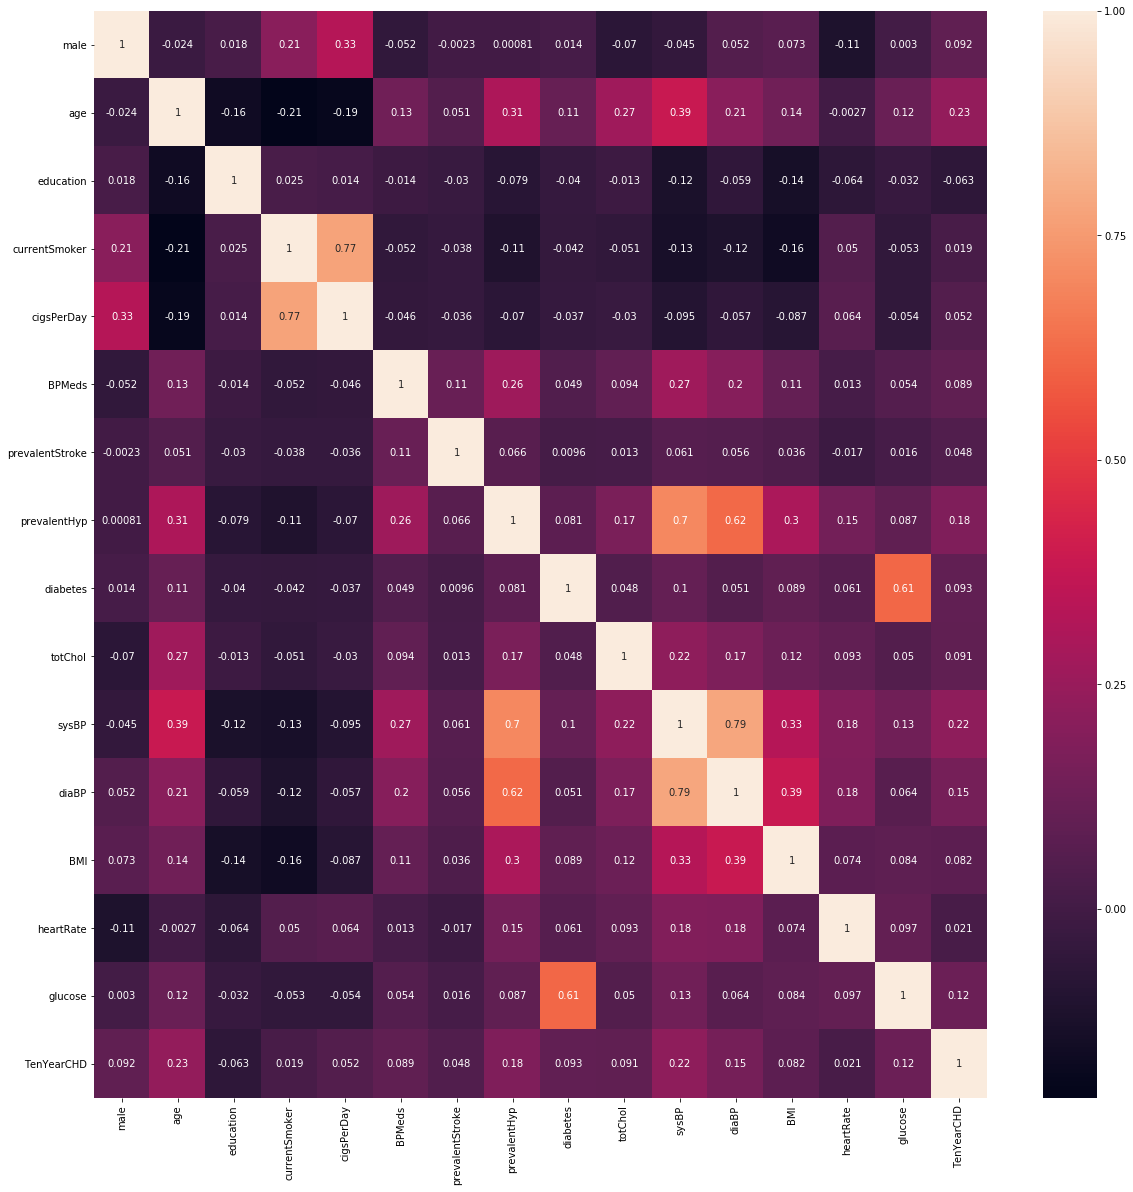

In [22]:
plt.figure(figsize = (20,20))
sns.heatmap(heart_df.corr(),annot = True)

## Drop the highly correlated and have negative corelation.

In [23]:
x_train1 = x_train.drop(['education','currentSmoker','BPMeds','prevalentHyp','diabetes','diaBP','BMI','heartRate'],1)
x_test1 = x_test.drop(['education','currentSmoker','BPMeds','prevalentHyp','diabetes','diaBP','BMI','heartRate'],1)

In [24]:
logml = sm.GLM(y_train,(sm.add_constant(x_train1)),family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2924
Model:                            GLM   Df Residuals:                     2916
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1109.0
Date:                Tue, 24 Mar 2020   Deviance:                       2218.0
Time:                        09:01:42   Pearson chi2:                 2.94e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.0773      0.527    -17.230      0.000     -10.110      -8.045
male                0.5874      0.119      4.932      0.000       0.354       0.821
age                 0.0622      0.007      8.675      0.000       0.048       0.076
cigsPerDay          0.0182      0.005      3.879      0.000       0.009       0.027
prevalentStroke     1.1266      0.551      2.044      0.041       0.046       2.207
totChol             0.0031      0.001      2.510      0.012       0.001       0.006
sysBP               0.0172      0.002      7.266      0.000       0.013       0.022
glucose             0.0070      0.002      3.889      0.000       0.003       0.010
===================================================================================
"""

### Apply the RFE method to select the best variables.

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 13 variables as output
rfe = rfe.fit(X,Y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

[ True  True  True  True  True  True  True  True  True False  True False
 False False False]
[1 1 1 1 1 1 1 1 1 6 1 2 3 4 5]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
col = ['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','sysBP']

### Model Selection

In [28]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(x_train[col], y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(x_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2924
Model:                            GLM   Df Residuals:                     2913
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1113.9
Date:                Tue, 24 Mar 2020   Deviance:                       2227.8
Time:                        09:13:32   Pearson chi2:                 2.88e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.4740      0.541    -13.825      0.000      -8.534      -6.414
male                0.5439      0.118      4.618      0.000       0.313       0.775
age                 0.0629      0.007      8.763      0.000       0.049       0.077
education          -0.0625      0.054     -1.148      0.251      -0.169       0.044
currentSmoker       0.0026      0.175      0.015      0.988      -0.341       0.347
cigsPerDay          0.0181      0.007      2.565      0.010       0.004       0.032
BPMeds              0.2147      0.261      0.821      0.411      -0.298       0.727
prevalentStroke     1.0773      0.554      1.944      0.052      -0.009       2.164
prevalentHyp        0.1534      0.150      1.021      0.307      -0.141       0.448
diabetes            0.7394      0.248      2.987      0.003       0.254       1.225
sysBP               0.0153      0.003      4.886      0.000       0.009       0.021
===================================================================================
"""

#### Check for VIF value. Take the VIF value <5.

In [30]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [31]:
heart_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [32]:
# Calculating Vif value
vif_cal(input_data=heart_df.drop(['totChol','diaBP','BMI','heartRate','glucose'], axis=1), dependent_col='TenYearCHD')

,Var,Vif
9,sysBP,40.53
1,age,32.89
3,currentSmoker,4.87
2,education,4.35
4,cigsPerDay,4.27
7,prevalentHyp,2.13
0,male,2.03
5,BPMeds,1.13
8,diabetes,1.04
6,prevalentStroke,1.02


In [33]:
heart_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
col = ['male','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [35]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2924
Model:                            GLM   Df Residuals:                     2915
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.7
Date:                Tue, 24 Mar 2020   Deviance:                       2355.4
Time:                        09:13:39   Pearson chi2:                 2.89e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1004      0.146    -14.391      0.000      -2.386      -1.814
male                0.4756      0.113      4.202      0.000       0.254       0.697
education          -0.1594      0.054     -2.971      0.003      -0.265      -0.054
currentSmoker      -0.1617      0.172     -0.941      0.347      -0.499       0.175
cigsPerDay          0.0143      0.007      2.049      0.040       0.001       0.028
BPMeds              0.5499      0.248      2.215      0.027       0.063       1.036
prevalentStroke     1.1245      0.532      2.115      0.034       0.083       2.167
prevalentHyp        0.8766      0.111      7.904      0.000       0.659       1.094
diabetes            0.9629      0.241      3.992      0.000       0.490       1.436
===================================================================================
"""

In [36]:
# Calculating Vif value
vif_cal(input_data=heart_df.drop(['totChol','diaBP','BMI','heartRate','glucose','sysBP','age'], axis=1), dependent_col='TenYearCHD')

,Var,Vif
2,currentSmoker,4.60
3,cigsPerDay,4.23
1,education,2.13
0,male,1.91
6,prevalentHyp,1.43
4,BPMeds,1.12
7,diabetes,1.03
5,prevalentStroke,1.02


In [37]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(x_train[col], y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predict the model.

In [38]:
y_pred = logsk.predict(x_test[col])

### Model Evaluation

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[  4 105]
 [  3 620]]


Confusion matrix, without normalization
[[  4 105]
 [  3 620]]


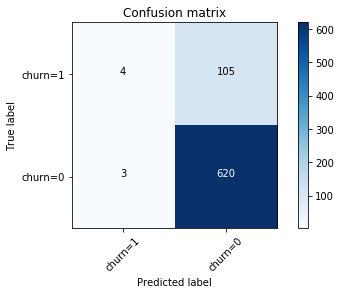

In [40]:
import numpy as np
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### Check for the Classification Report.

In [41]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       623
           1       0.57      0.04      0.07       109

   micro avg       0.85      0.85      0.85       732
   macro avg       0.71      0.52      0.49       732
weighted avg       0.81      0.85      0.79       732



In [42]:
y_pred_prob = logsk.predict_proba(x_test[col])

### Check for the Logloss

In [43]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_prob)

0.396354777481368

#### Check for the Jaccard Index Score

In [44]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.8524590163934426